In [1]:
!gdown 

Downloading...
From: https://drive.google.com/uc?id=............
To: /content/kaggle.json
100% 63.0/63.0 [00:00<00:00, 245kB/s]


In [2]:
!pip install kaggle

In [3]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset

100% 149M/149M [00:04<00:00, 41.1MB/s]
100% 149M/149M [00:04<00:00, 36.4MB/s]


In [7]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
device_name

'/device:GPU:0'

In [8]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if len(device_name) > 0:
    print("Found GPU at: {}".format(device_name))
else:
    device_name = "/device:CPU:0"
    print("No GPU, using {}.".format(device_name))

Found GPU at: /device:GPU:0


In [9]:
import zipfile

# Replace 'your_dataset.zip' with the actual name of your zip file
zip_file_path = 'brain-tumor-mri-dataset.zip'
extracted_folder_path = '/content'  # You can specify the folder where you want to extract the files

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)

print(f'Dataset extracted to {extracted_folder_path}')

Dataset extracted to /content


In [10]:
import os

for dirpath, dirnames, filenames in os.walk("/content/Testing"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

for dirpath, dirnames, filenames in os.walk("/content/Training"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 4 directories and 0 images in '/content/Testing'.
There are 0 directories and 300 images in '/content/Testing/pituitary'.
There are 0 directories and 405 images in '/content/Testing/notumor'.
There are 0 directories and 306 images in '/content/Testing/meningioma'.
There are 0 directories and 300 images in '/content/Testing/glioma'.
There are 4 directories and 0 images in '/content/Training'.
There are 0 directories and 1457 images in '/content/Training/pituitary'.
There are 0 directories and 1595 images in '/content/Training/notumor'.
There are 0 directories and 1339 images in '/content/Training/meningioma'.
There are 0 directories and 1321 images in '/content/Training/glioma'.


In [11]:
# Get the class names programmtically
import pathlib
import numpy as np
data_dir = pathlib.Path("Testing")
# Check if the directory exists and is accessible
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
# Created a list of class_names from the subdirectories
print(class_names)


['glioma' 'meningioma' 'notumor' 'pituitary']


In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model

In [13]:
len(class_names)

4

In [14]:
# make the directories for the train and test

train_dir = "/content/Training"
test_dir = "/content/Testing"

# rescalling
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   validation_split = 0.2)

# Importing the data
print("For the training:")
train_data =  train_datagen.flow_from_directory(directory = train_dir,
                                                target_size = (256,256),
                                                batch_size = 32,
                                                class_mode = "categorical",
                                                subset = "training")
print("For the testing:")
# making validation dataset
testing_data = train_datagen.flow_from_directory(directory = test_dir,
                                                    target_size = (256, 256),
                                                    batch_size = 32,
                                                    class_mode = "categorical",
                                                    subset = "validation")

For the training:
Found 4571 images belonging to 4 classes.
For the testing:
Found 262 images belonging to 4 classes.


In [15]:
import random
import matplotlib.pyplot as plt

def plot_loss_curves(history):
    """
    Plot separate loss curves for training and validation.
    """
    # Set random seed for reproducibility
    random.seed(42)
    np.random.seed(42)
    tf.random.set_seed(42)

    # Plot losses
    plt.figure(figsize=(12, 6))

    # Loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history["loss"], label="Training Loss")
    plt.plot(history.history["val_loss"], label="Validation Loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    # Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history["accuracy"], label="Training Accuracy")
    plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()

## Custom CNN Model
 - 80% Average Accuracy -> Not the best But Acceptable Baseline

In [ ]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, 3, padding="same", activation="relu", input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPool2D(),  # Default parameters
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv2D(32, 3, padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(),  # Default parameters
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4, activation="softmax")  # 4 output labels
])

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 16)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 128, 128, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 131072)            0

In [ ]:
# compile the model
model_1.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# fit the model
history_1 = model_1.fit(train_data,
                        epochs = 15,
                        steps_per_epoch = len(train_data),
                        validation_data = testing_data,
                        validation_steps = len(testing_data)
                        )

Epoch 1/15
143/143 [==============================] - 27s 96ms/step - loss: 1.1003 - accuracy: 0.6355 - val_loss: 1.1131 - val_accuracy: 0.5420
Epoch 2/15
143/143 [==============================] - 15s 106ms/step - loss: 0.4259 - accuracy: 0.8497 - val_loss: 0.8730 - val_accuracy: 0.6718
Epoch 3/15
143/143 [==============================] - 17s 117ms/step - loss: 0.2440 - accuracy: 0.9147 - val_loss: 0.7759 - val_accuracy: 0.7443
Epoch 4/15
143/143 [==============================] - 16s 108ms/step - loss: 0.1618 - accuracy: 0.9438 - val_loss: 0.8566 - val_accuracy: 0.7061
Epoch 5/15
143/143 [==============================] - 14s 95ms/step - loss: 0.1086 - accuracy: 0.9635 - val_loss: 0.8807 - val_accuracy: 0.7977
Epoch 6/15
143/143 [==============================] - 14s 96ms/step - loss: 0.0735 - accuracy: 0.9748 - val_loss: 0.9886 - val_accuracy: 0.7939
Epoch 7/15
143/143 [==============================] - 14s 95ms/step - loss: 0.0563 - accuracy: 0.9825 - val_loss: 0.9598 - val_accura

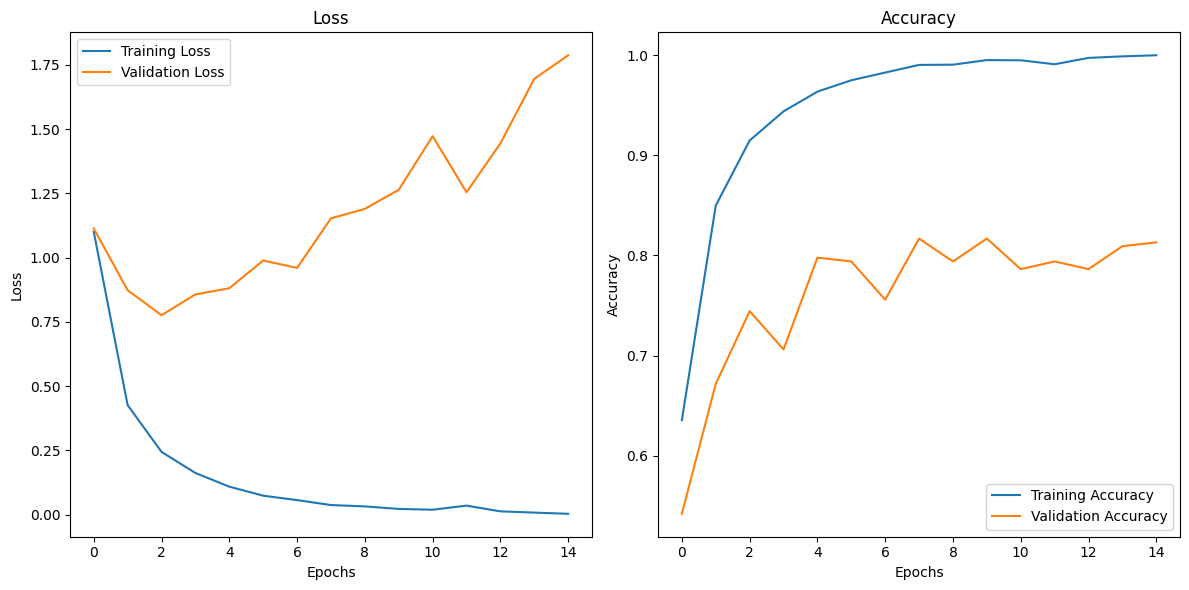

In [ ]:
plot_loss_curves(history_1)

In [ ]:
# Serialization of model_1
from tensorflow.keras.models import load_model

model_1.save('Brain_Tumour_CNN.keras')

## EfficientNetB6 Pre Trained Model
 - 45% Average Accuracy -> Not Preferred

In [ ]:
# 1. Create base model with tf.keras.applications
base_model = tf.keras.applications.EfficientNetB6(include_top=False)

# 2. Freeze the base model (so the pre-learned patterns remain)
base_model.trainable = False

# 3. Create inputs into the base model
inputs = tf.keras.layers.Input(shape=(256, 256, 3), name="input_layer")

# 4. Pass the inputs to the base_model (note: using tf.keras.applications, EfficientNet inputs don't have to be normalized)
x = base_model(inputs)

# 6. Average pool the outputs of the base model (aggregate all the most important information, reduce number of computations)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"After GlobalAveragePooling2D(): {x.shape}")

# 7. Create the output activation layer
outputs = tf.keras.layers.Dense(4, activation="softmax", name="output_layer")(x)

# 8. Combine the inputs with the outputs into a model
model_2 = tf.keras.Model(inputs, outputs)

# 9. Compile the model
with tf.device(device_name):
    model_2.compile(
        loss='categorical_crossentropy',
        optimizer=tf.keras.optimizers.Adam(),
        metrics=["accuracy"]
    )

165234480/165234480 [==============================] - 1s 0us/step
After GlobalAveragePooling2D(): (None, 2304)


In [ ]:
model_2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 256, 256, 3)]     0         
                                                                 
 efficientnetb6 (Functional  (None, None, None, 2304   40960143  
 )                           )                                   
                                                                 
 global_average_pooling_lay  (None, 2304)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 output_layer (Dense)        (None, 4)                 9220      
                                                                 
Total params: 40969363 (156.29 MB)
Trainable params: 9220 (36.02 KB)
Non-trainable params: 40960143 (156.25 MB)
_______________

In [ ]:
# 10. Fit the model (we use less steps for validation so it's faster)
history_2 = model_2.fit(train_data,
                        epochs= 20,
                        steps_per_epoch=len(train_data),
                        validation_data=testing_data,
                        # Go through less of the validation data so epochs are faster (we want faster experiments!)
                        validation_steps=len(testing_data),
                        )

Epoch 1/20
143/143 [==============================] - 80s 426ms/step - loss: 1.2052 - accuracy: 0.4426 - val_loss: 1.3321 - val_accuracy: 0.3626
Epoch 2/20
143/143 [==============================] - 54s 375ms/step - loss: 1.1039 - accuracy: 0.5312 - val_loss: 1.3405 - val_accuracy: 0.3626
Epoch 3/20
143/143 [==============================] - 56s 391ms/step - loss: 1.0877 - accuracy: 0.5439 - val_loss: 1.3042 - val_accuracy: 0.4351
Epoch 4/20
143/143 [==============================] - 54s 376ms/step - loss: 1.0603 - accuracy: 0.5461 - val_loss: 1.3713 - val_accuracy: 0.4580
Epoch 5/20
143/143 [==============================] - 53s 374ms/step - loss: 1.0379 - accuracy: 0.5511 - val_loss: 1.3396 - val_accuracy: 0.4542
Epoch 6/20
143/143 [==============================] - 56s 392ms/step - loss: 1.0344 - accuracy: 0.5533 - val_loss: 1.3482 - val_accuracy: 0.4160
Epoch 7/20
143/143 [==============================] - 54s 374ms/step - loss: 1.0149 - accuracy: 0.5725 - val_loss: 1.3030 - val_ac

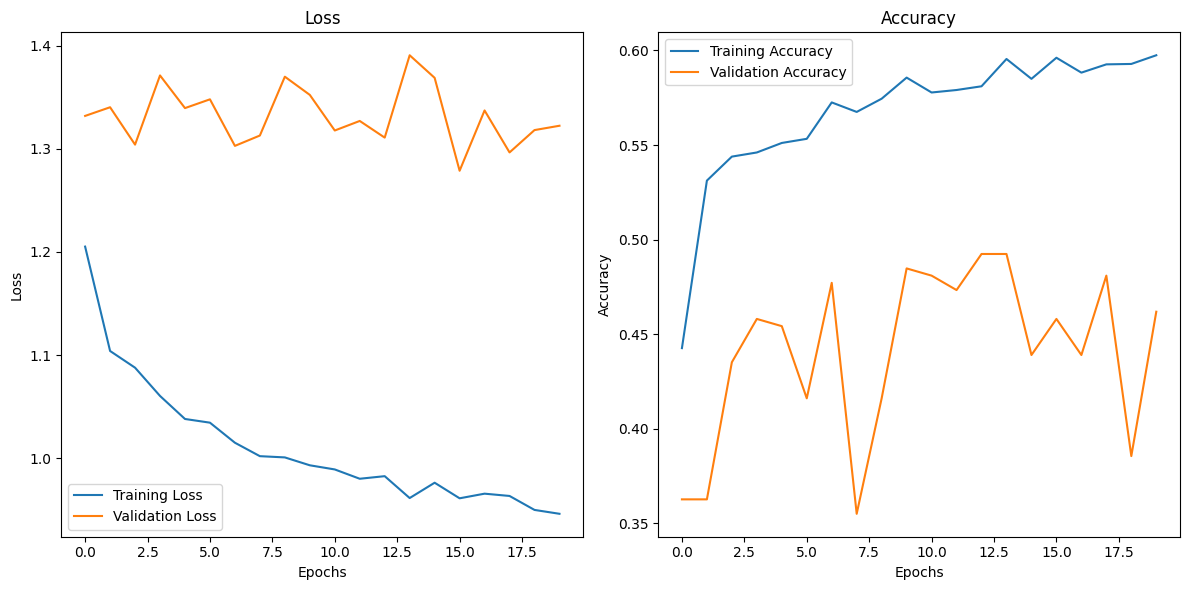

In [ ]:
plot_loss_curves(history_2)

In [ ]:
# Serialization of model_1
from tensorflow.keras.models import load_model

model_2.save('Brain_Tumour_EffecientNet.keras')

## ResNet101V2 Pre -Trained Model
 - 85% Average Accuracy - Acceptable

In [ ]:
# 1. Create base model with tf.keras.applications
base_model = tf.keras.applications.ResNet101V2(include_top=False)

# 2. Freeze the base model (so the pre-learned patterns remain)
base_model.trainable = False

# 3. Create inputs into the base model
inputs = tf.keras.layers.Input(shape=(256, 256, 3), name="input_layer")

# 4. Pass the inputs to the base_model
x = base_model(inputs)

# 6. Average pool the outputs of the base model (aggregate all the most important information, reduce number of computations)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"After GlobalAveragePooling2D(): {x.shape}")
#x = tf.keras.layers.Dropout(0.5)
# x = tf.keras.layers.Flatten()(x)
# 7. Create the output activation layer
outputs = tf.keras.layers.Dense(4, activation="softmax", name="output_layer")(x)

# 8. Combine the inputs with the outputs into a model
model_3 = tf.keras.Model(inputs, outputs)

# 9. Compile the model
with tf.device(device_name):
    model_3.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

171317808/171317808 [==============================] - 1s 0us/step
After GlobalAveragePooling2D(): (None, 2048)


In [ ]:
model_3.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 256, 256, 3)]     0         
                                                                 
 resnet101v2 (Functional)    (None, None, None, 2048   42626560  
                             )                                   
                                                                 
 global_average_pooling_lay  (None, 2048)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 output_layer (Dense)        (None, 4)                 8196      
                                                                 
Total params: 42634756 (162.64 MB)
Trainable params: 8196 (32.02 KB)
Non-trainable params: 42626560 (162.61 MB)
_____________

In [ ]:
# 10. Fit the model (we use less steps for validation so it's faster)
history_3 = model_3.fit(train_data,
                        epochs= 20,
                        steps_per_epoch=len(train_data),
                        validation_data=testing_data,
                        # Go through less of the validation data so epochs are faster (we want faster experiments!)
                        validation_steps=len(testing_data),
                        )

Epoch 1/20
143/143 [==============================] - 41s 231ms/step - loss: 0.5229 - accuracy: 0.8105 - val_loss: 0.7360 - val_accuracy: 0.6947
Epoch 2/20
143/143 [==============================] - 30s 208ms/step - loss: 0.2961 - accuracy: 0.8956 - val_loss: 0.6168 - val_accuracy: 0.7481
Epoch 3/20
143/143 [==============================] - 29s 205ms/step - loss: 0.2342 - accuracy: 0.9208 - val_loss: 0.5265 - val_accuracy: 0.7939
Epoch 4/20
143/143 [==============================] - 29s 205ms/step - loss: 0.1964 - accuracy: 0.9326 - val_loss: 0.4655 - val_accuracy: 0.7863
Epoch 5/20
143/143 [==============================] - 30s 207ms/step - loss: 0.1718 - accuracy: 0.9431 - val_loss: 0.4286 - val_accuracy: 0.8206
Epoch 6/20
143/143 [==============================] - 30s 212ms/step - loss: 0.1550 - accuracy: 0.9514 - val_loss: 0.3837 - val_accuracy: 0.8664
Epoch 7/20
143/143 [==============================] - 30s 208ms/step - loss: 0.1451 - accuracy: 0.9534 - val_loss: 0.3996 - val_ac

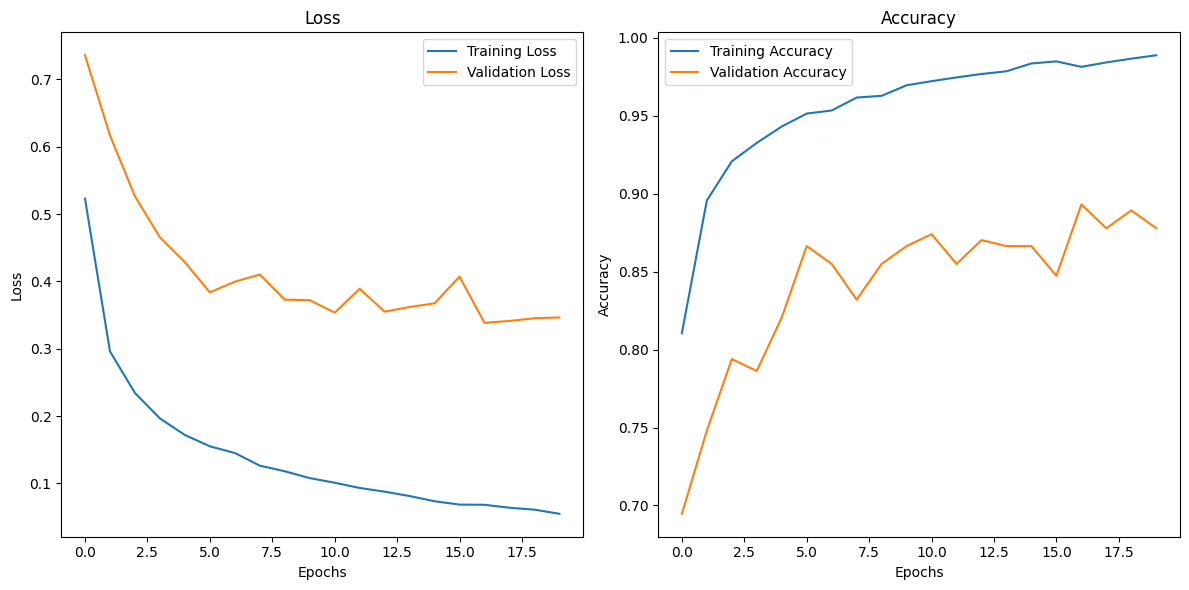

In [ ]:
plot_loss_curves(history_3)

In [ ]:
# Serialization of model_1
from tensorflow.keras.models import load_model

model_3.save('Brain_Tumour_ResNet.keras')

## VCG16 Pre - Trained Model
 - 66% Percent Accuracy -> Not Acceptable

In [ ]:
import tensorflow as tf
from tqdm import tqdm
# 1. Create base model with tf.keras.applications
base_model = tf.keras.applications.vgg16.VGG16(include_top=False)

# 2. Freeze the base model (so the pre-learned patterns remain)
base_model.trainable = False

# 3. Create inputs into the base model
inputs = tf.keras.layers.Input(shape=(256, 256, 3), name="input_layer")

# 4. Pass the inputs to the base_model (note: using tf.keras.applications, EfficientNet inputs don't have to be normalized)
x = base_model(inputs)

# 6. Average pool the outputs of the base model (aggregate all the most important information, reduce number of computations)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"After GlobalAveragePooling2D(): {x.shape}")

# 7. Create the output activation layer
outputs = tf.keras.layers.Dense(4, activation="softmax", name="output_layer")(x)

# 8. Combine the inputs with the outputs into a model
model_4 = tf.keras.Model(inputs, outputs)

# 9. Compile the model
with tf.device(device_name):
    model_4.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

58889256/58889256 [==============================] - 0s 0us/step
After GlobalAveragePooling2D(): (None, 512)


In [ ]:
model_4.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 256, 256, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 global_average_pooling_lay  (None, 512)               0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 output_layer (Dense)        (None, 4)                 2052      
                                                                 
Total params: 14716740 (56.14 MB)
Trainable params: 2052 (8.02 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [ ]:
# 10. Fit the model (we use less steps for validation so it's faster)
history_4 = model_4.fit(train_data,
                        epochs= 20,
                        steps_per_epoch=len(train_data),
                        validation_data=testing_data,
                        # Go through less of the validation data so epochs are faster (we want faster experiments!)
                        validation_steps=len(testing_data),
                        )

Epoch 1/20
143/143 [==============================] - 37s 229ms/step - loss: 1.1841 - accuracy: 0.5918 - val_loss: 1.1680 - val_accuracy: 0.6107
Epoch 2/20
143/143 [==============================] - 25s 175ms/step - loss: 0.8946 - accuracy: 0.7738 - val_loss: 1.0804 - val_accuracy: 0.5916
Epoch 3/20
143/143 [==============================] - 26s 182ms/step - loss: 0.7500 - accuracy: 0.8119 - val_loss: 1.0490 - val_accuracy: 0.6069
Epoch 4/20
143/143 [==============================] - 26s 183ms/step - loss: 0.6594 - accuracy: 0.8322 - val_loss: 1.0243 - val_accuracy: 0.6107
Epoch 5/20
143/143 [==============================] - 25s 174ms/step - loss: 0.5989 - accuracy: 0.8438 - val_loss: 0.9972 - val_accuracy: 0.6069
Epoch 6/20
143/143 [==============================] - 25s 175ms/step - loss: 0.5544 - accuracy: 0.8541 - val_loss: 1.0048 - val_accuracy: 0.6298
Epoch 7/20
143/143 [==============================] - 26s 183ms/step - loss: 0.5197 - accuracy: 0.8617 - val_loss: 0.9914 - val_ac

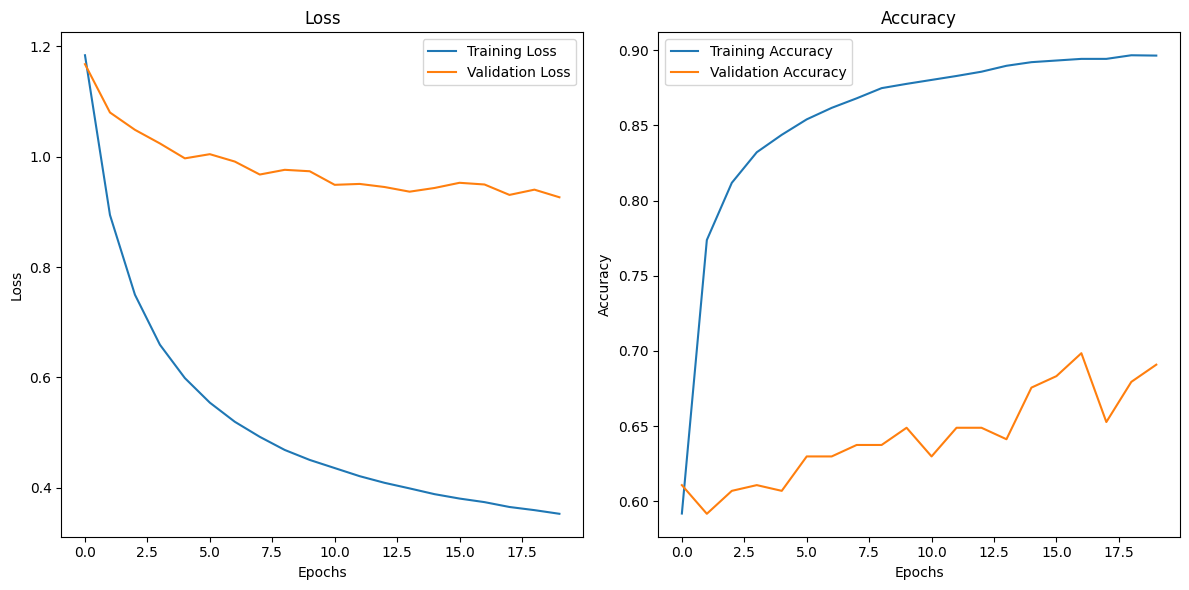

In [ ]:
plot_loss_curves(history_4)

In [ ]:
# Serialization of model_1
from tensorflow.keras.models import load_model

model_4.save('Brain_Tumour_VCG.keras')

# Trying Out Different Pre - Trained Models to find good ones for this ensemble Model

## Xception Pre - Trained Model
 - 88% Accuracy -> Good

In [ ]:
import tensorflow as tf
from tqdm import tqdm

# 1. Create base model with tf.keras.applications
base_model = tf.keras.applications.Xception(include_top=False)

# 2. Freeze the base model (so the pre-learned patterns remain)
base_model.trainable = False

# 3. Create inputs into the base model
inputs = tf.keras.layers.Input(shape=(256, 256, 3), name="input_layer")

# 4. Pass the inputs to the base_model (note: using tf.keras.applications, Xception inputs don't have to be normalized)
x = base_model(inputs)

# 6. Average pool the outputs of the base model (aggregate all the most important information, reduce number of computations)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"After GlobalAveragePooling2D(): {x.shape}")

# 7. Create the output activation layer
outputs = tf.keras.layers.Dense(4, activation="softmax", name="output_layer")(x)

# 8. Combine the inputs with the outputs into a model
model_5 = tf.keras.Model(inputs, outputs)

# 9. Compile the model
with tf.device(device_name):
    model_5.compile(
        loss='categorical_crossentropy',
        optimizer=tf.keras.optimizers.Adam(),
        metrics=["accuracy"]
    )

83683744/83683744 [==============================] - 0s 0us/step
After GlobalAveragePooling2D(): (None, 2048)


In [ ]:
model_5.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 256, 256, 3)]     0         
                                                                 
 xception (Functional)       (None, None, None, 2048   20861480  
                             )                                   
                                                                 
 global_average_pooling_lay  (None, 2048)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 output_layer (Dense)        (None, 4)                 8196      
                                                                 
Total params: 20869676 (79.61 MB)
Trainable params: 8196 (32.02 KB)
Non-trainable params: 20861480 (79.58 MB)
_______________

In [ ]:
# 10. Fit the model (we use fewer steps for validation so it's faster)
history_5 = model_5.fit(
    train_data,
    epochs=20,
    steps_per_epoch=len(train_data),
    validation_data=testing_data,
    validation_steps=len(testing_data),
)

Epoch 1/20
143/143 [==============================] - 34s 203ms/step - loss: 0.5968 - accuracy: 0.7961 - val_loss: 0.6184 - val_accuracy: 0.7672
Epoch 2/20
143/143 [==============================] - 26s 179ms/step - loss: 0.3587 - accuracy: 0.8814 - val_loss: 0.5483 - val_accuracy: 0.7977
Epoch 3/20
143/143 [==============================] - 24s 170ms/step - loss: 0.2993 - accuracy: 0.9011 - val_loss: 0.5072 - val_accuracy: 0.8130
Epoch 4/20
143/143 [==============================] - 26s 178ms/step - loss: 0.2644 - accuracy: 0.9105 - val_loss: 0.4862 - val_accuracy: 0.8282
Epoch 5/20
143/143 [==============================] - 24s 170ms/step - loss: 0.2389 - accuracy: 0.9215 - val_loss: 0.4705 - val_accuracy: 0.8321
Epoch 6/20
143/143 [==============================] - 25s 177ms/step - loss: 0.2223 - accuracy: 0.9247 - val_loss: 0.4496 - val_accuracy: 0.8397
Epoch 7/20
143/143 [==============================] - 26s 178ms/step - loss: 0.2070 - accuracy: 0.9333 - val_loss: 0.4872 - val_ac

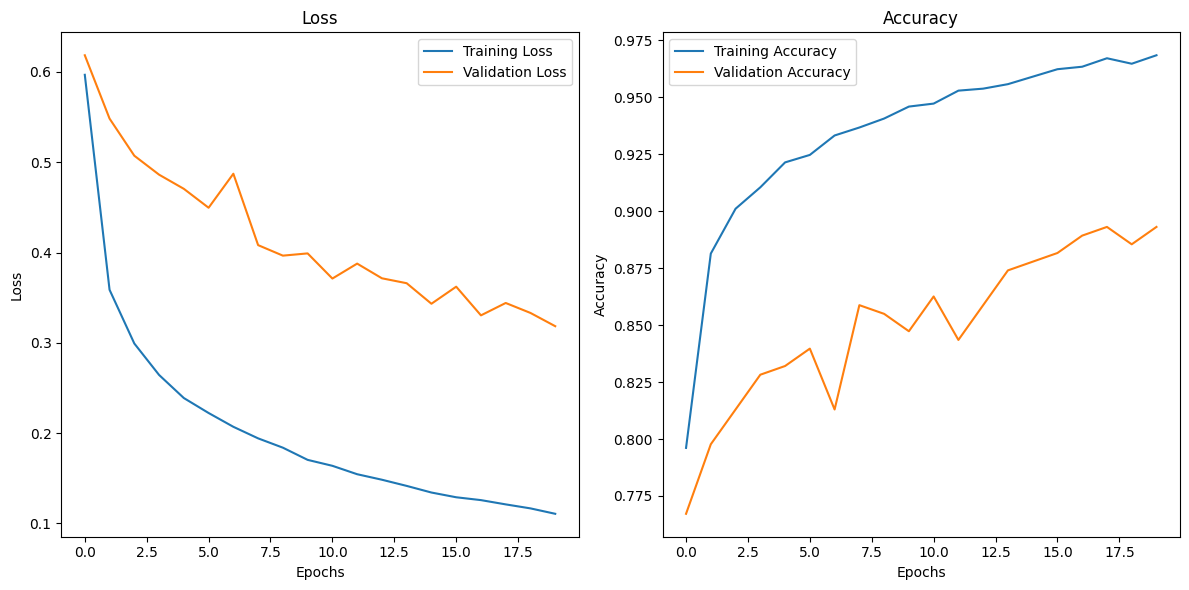

In [ ]:
plot_loss_curves(history_5)

In [ ]:
# Serialization of model_1
from tensorflow.keras.models import load_model

model_5.save('Brain_Tumour_Xception.keras')

## ResNet151V2 Pre - Trained Model
 - 82% Accuracy -> Good

In [ ]:
import tensorflow as tf
from tqdm import tqdm

# 1. Create base model with tf.keras.applications
base_model = tf.keras.applications.ResNet152V2(weights='imagenet', include_top=False)

# 2. Freeze the base model (so the pre-learned patterns remain)
base_model.trainable = False

# 3. Create inputs into the base model
inputs = tf.keras.layers.Input(shape=(256, 256, 3), name="input_layer")

# 4. Pass the inputs to the base_model
x = base_model(inputs)

# 6. Average pool the outputs of the base model
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"After GlobalAveragePooling2D(): {x.shape}")

# 7. Create the output activation layer
outputs = tf.keras.layers.Dense(4, activation="softmax", name="output_layer")(x)

# 8. Combine the inputs with the outputs into a model
model_6 = tf.keras.Model(inputs, outputs)

# 9. Compile the model
with tf.device(device_name):
    model_6.compile(
        loss='categorical_crossentropy',
        optimizer=tf.keras.optimizers.Adam(),
        metrics=["accuracy"]
    )

234545216/234545216 [==============================] - 1s 0us/step
After GlobalAveragePooling2D(): (None, 2048)


In [ ]:
model_6.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 256, 256, 3)]     0         
                                                                 
 resnet152v2 (Functional)    (None, None, None, 2048   58331648  
                             )                                   
                                                                 
 global_average_pooling_lay  (None, 2048)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 output_layer (Dense)        (None, 4)                 8196      
                                                                 
Total params: 58339844 (222.55 MB)
Trainable params: 8196 (32.02 KB)
Non-trainable params: 58331648 (222.52 MB)
_____________

In [ ]:
# 10. Fit the model
history_6 = model_6.fit(
    train_data,
    epochs=20,
    steps_per_epoch=len(train_data),
    validation_data=testing_data,
    validation_steps=len(testing_data),
)


Epoch 1/20
143/143 [==============================] - 54s 314ms/step - loss: 0.5327 - accuracy: 0.7992 - val_loss: 0.6734 - val_accuracy: 0.7443
Epoch 2/20
143/143 [==============================] - 43s 297ms/step - loss: 0.2970 - accuracy: 0.8989 - val_loss: 0.6350 - val_accuracy: 0.7214
Epoch 3/20
143/143 [==============================] - 42s 296ms/step - loss: 0.2372 - accuracy: 0.9206 - val_loss: 0.5514 - val_accuracy: 0.7901
Epoch 4/20
143/143 [==============================] - 43s 297ms/step - loss: 0.2019 - accuracy: 0.9342 - val_loss: 0.4556 - val_accuracy: 0.8473
Epoch 5/20
143/143 [==============================] - 43s 297ms/step - loss: 0.1792 - accuracy: 0.9427 - val_loss: 0.4681 - val_accuracy: 0.7977
Epoch 6/20
143/143 [==============================] - 42s 296ms/step - loss: 0.1576 - accuracy: 0.9473 - val_loss: 0.4278 - val_accuracy: 0.8588
Epoch 7/20
143/143 [==============================] - 42s 297ms/step - loss: 0.1455 - accuracy: 0.9549 - val_loss: 0.4391 - val_ac

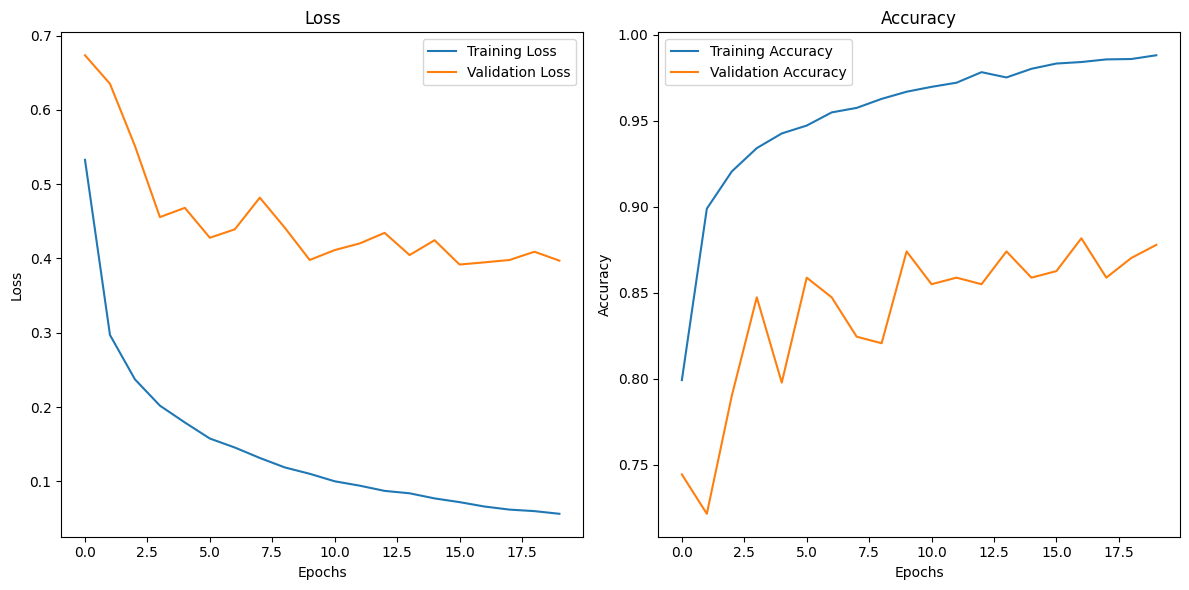

In [ ]:
plot_loss_curves(history_6)

In [ ]:
# Serialization of model_1
from tensorflow.keras.models import load_model

model_6.save('Brain_Tumour_ResNet151V2.keras')

## InceptionResNetV2 Pre - Trained Model
 - 80% Accuracy -> Good

In [ ]:
import tensorflow as tf
from tqdm import tqdm

# 1. Create base model with tf.keras.applications
base_model = tf.keras.applications.InceptionResNetV2(weights='imagenet', include_top=False)

# 2. Freeze the base model (so the pre-learned patterns remain)
base_model.trainable = False

# 3. Create inputs into the base model
inputs = tf.keras.layers.Input(shape=(256, 256, 3), name="input_layer")

# 4. Pass the inputs to the base_model
x = base_model(inputs)

# 6. Average pool the outputs of the base model
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"After GlobalAveragePooling2D(): {x.shape}")

# 7. Create the output activation layer
outputs = tf.keras.layers.Dense(4, activation="softmax", name="output_layer")(x)

# 8. Combine the inputs with the outputs into a model
model_7 = tf.keras.Model(inputs, outputs)

# 9. Compile the model
with tf.device(device_name):
    model_7.compile(
        loss='categorical_crossentropy',
        optimizer=tf.keras.optimizers.Adam(),
        metrics=["accuracy"]
    )

219055592/219055592 [==============================] - 1s 0us/step
After GlobalAveragePooling2D(): (None, 1536)


In [ ]:
model_7.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 256, 256, 3)]     0         
                                                                 
 inception_resnet_v2 (Funct  (None, None, None, 1536   54336736  
 ional)                      )                                   
                                                                 
 global_average_pooling_lay  (None, 1536)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 output_layer (Dense)        (None, 4)                 6148      
                                                                 
Total params: 54342884 (207.30 MB)
Trainable params: 6148 (24.02 KB)
Non-trainable params: 54336736 (207.28 MB)
_____________

In [ ]:
# 10. Fit the model
history_7 = model_7.fit(
    train_data,
    epochs=20,
    steps_per_epoch=len(train_data),
    validation_data=testing_data,
    validation_steps=len(testing_data),
)

Epoch 1/20
143/143 [==============================] - 54s 288ms/step - loss: 0.5897 - accuracy: 0.7799 - val_loss: 0.7727 - val_accuracy: 0.6718
Epoch 2/20
143/143 [==============================] - 35s 243ms/step - loss: 0.3661 - accuracy: 0.8720 - val_loss: 0.7092 - val_accuracy: 0.7405
Epoch 3/20
143/143 [==============================] - 35s 244ms/step - loss: 0.3105 - accuracy: 0.8893 - val_loss: 0.6101 - val_accuracy: 0.7595
Epoch 4/20
143/143 [==============================] - 35s 243ms/step - loss: 0.2793 - accuracy: 0.9033 - val_loss: 0.5827 - val_accuracy: 0.7824
Epoch 5/20
143/143 [==============================] - 35s 243ms/step - loss: 0.2600 - accuracy: 0.9101 - val_loss: 0.5510 - val_accuracy: 0.7901
Epoch 6/20
143/143 [==============================] - 35s 243ms/step - loss: 0.2371 - accuracy: 0.9191 - val_loss: 0.5332 - val_accuracy: 0.7786
Epoch 7/20
143/143 [==============================] - 35s 244ms/step - loss: 0.2267 - accuracy: 0.9274 - val_loss: 0.5537 - val_ac

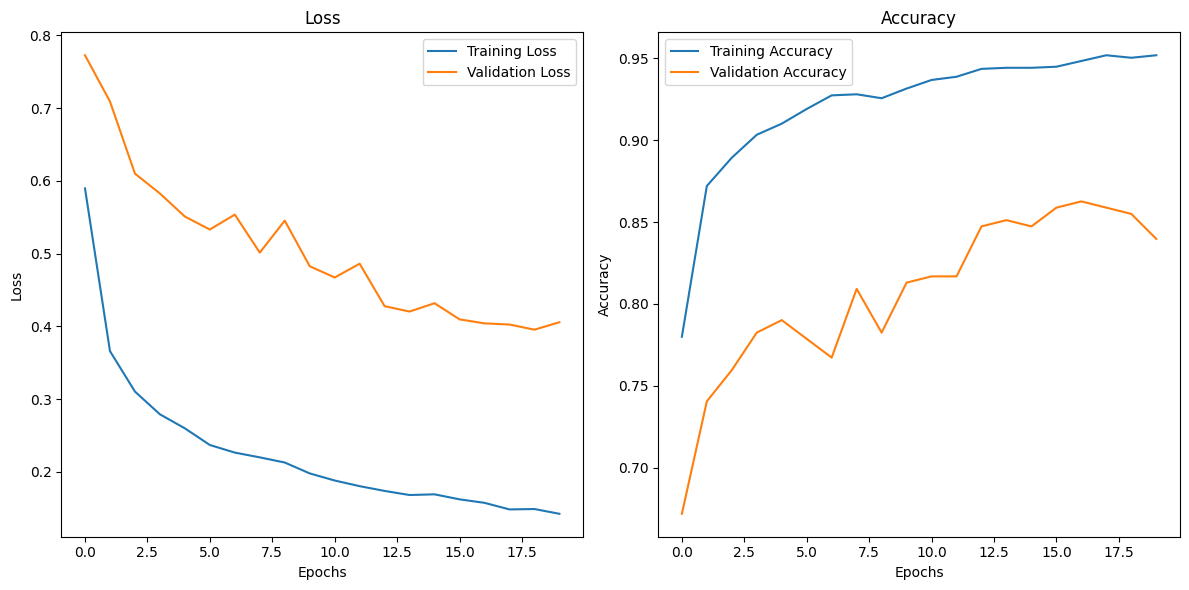

In [ ]:
plot_loss_curves(history_7)

In [ ]:
# Serialization of model_1
from tensorflow.keras.models import load_model

model_7.save('Brain_Tumour_InceptionResNetV2.keras')

## DenseNet201 Pre - Trained Model
 - 80% Accuracy -> Good

In [ ]:
import tensorflow as tf
from tqdm import tqdm

# 1. Create base model with tf.keras.applications
base_model = tf.keras.applications.DenseNet201(weights='imagenet', include_top=False)

# 2. Freeze the base model (so the pre-learned patterns remain)
base_model.trainable = False

# 3. Create inputs into the base model
inputs = tf.keras.layers.Input(shape=(256, 256, 3), name="input_layer")

# 4. Pass the inputs to the base_model
x = base_model(inputs)

# 6. Average pool the outputs of the base model
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"After GlobalAveragePooling2D(): {x.shape}")

# 7. Create the output activation layer
outputs = tf.keras.layers.Dense(4, activation="softmax", name="output_layer")(x)

# 8. Combine the inputs with the outputs into a model
model_8 = tf.keras.Model(inputs, outputs)

# 9. Compile the model
with tf.device(device_name):
    model_8.compile(
        loss='categorical_crossentropy',
        optimizer=tf.keras.optimizers.Adam(),
        metrics=["accuracy"]
    )

74836368/74836368 [==============================] - 1s 0us/step
After GlobalAveragePooling2D(): (None, 1920)


In [ ]:
model_8.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 256, 256, 3)]     0         
                                                                 
 densenet201 (Functional)    (None, None, None, 1920   18321984  
                             )                                   
                                                                 
 global_average_pooling_lay  (None, 1920)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 output_layer (Dense)        (None, 4)                 7684      
                                                                 
Total params: 18329668 (69.92 MB)
Trainable params: 7684 (30.02 KB)
Non-trainable params: 18321984 (69.89 MB)
_______________

In [ ]:
# 10. Fit the model
history_8 = model_8.fit(
    train_data,
    epochs=20,
    steps_per_epoch=len(train_data),
    validation_data=testing_data,
    validation_steps=len(testing_data),
)

Epoch 1/20
143/143 [==============================] - 53s 269ms/step - loss: 0.5595 - accuracy: 0.8070 - val_loss: 0.8218 - val_accuracy: 0.7023
Epoch 2/20
143/143 [==============================] - 29s 200ms/step - loss: 0.3121 - accuracy: 0.9000 - val_loss: 0.7672 - val_accuracy: 0.6985
Epoch 3/20
143/143 [==============================] - 28s 198ms/step - loss: 0.2594 - accuracy: 0.9175 - val_loss: 0.7244 - val_accuracy: 0.7137
Epoch 4/20
143/143 [==============================] - 28s 199ms/step - loss: 0.2227 - accuracy: 0.9302 - val_loss: 0.7041 - val_accuracy: 0.7252
Epoch 5/20
143/143 [==============================] - 29s 200ms/step - loss: 0.2045 - accuracy: 0.9333 - val_loss: 0.6193 - val_accuracy: 0.7481
Epoch 6/20
143/143 [==============================] - 29s 200ms/step - loss: 0.1824 - accuracy: 0.9414 - val_loss: 0.6006 - val_accuracy: 0.7710
Epoch 7/20
143/143 [==============================] - 29s 199ms/step - loss: 0.1691 - accuracy: 0.9466 - val_loss: 0.5583 - val_ac

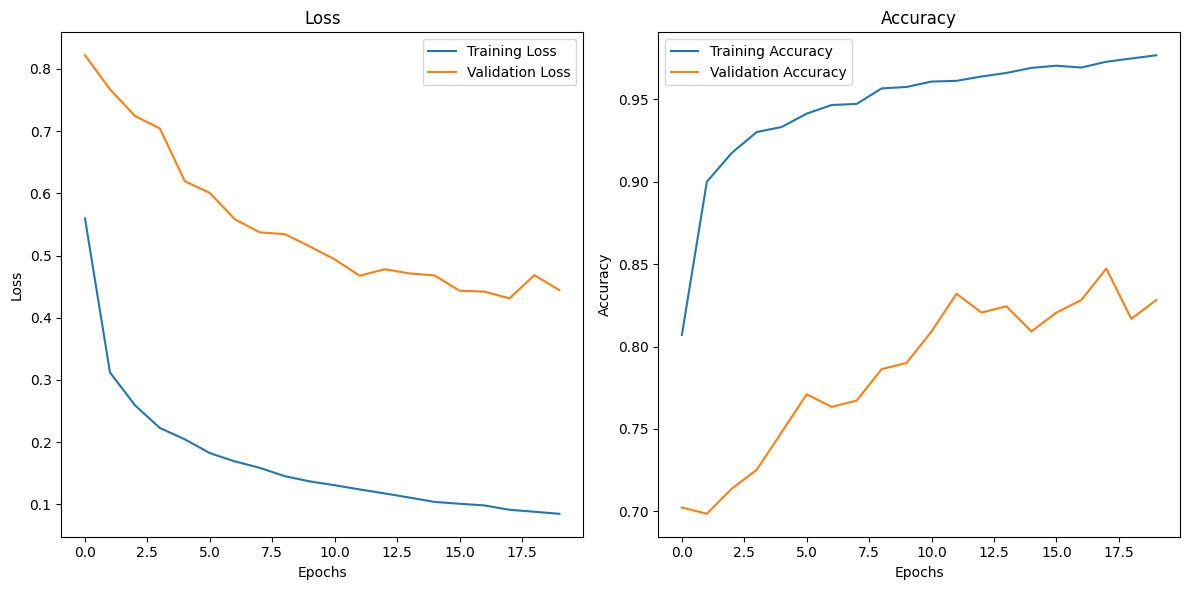

In [ ]:
plot_loss_curves(history_8)

In [ ]:
# Serialization of model_1
from tensorflow.keras.models import load_model

model_8.save('Brain_Tumour_DenseNet201.keras')

## Saving all the .keras file in GDrive

In [21]:
import os
from google.colab import drive
from zipfile import ZipFile
from datetime import datetime

# Mount Google Drive
drive.mount('/content/drive')

# Set the path to the directory containing .keras files
content_path = '/content/'

# Get a list of all .keras files in the content directory
keras_files = [file for file in os.listdir(content_path) if file.endswith('.keras')]

# Generate a numbered file name using the current timestamp
timestamp = datetime.now().strftime("%Y%m%d%H%M%S")
drive_zip_path = f'/content/drive/MyDrive/Colab_Data/keras_models_{timestamp}.zip'

# Create a zip file containing all .keras files
with ZipFile(drive_zip_path, 'w') as zip_file:
    for file in keras_files:
        file_path = os.path.join(content_path, file)
        zip_file.write(file_path, os.path.basename(file_path))

print(f"Zipped {len(keras_files)} .keras files.")

# Confirm that the zip file has been saved to the specified path on Google Drive
os.listdir('/content/drive/MyDrive/Colab_Data/')


Mounted at /content/drive
Zipped 6 .keras files.


['keras_models_20231129190627.zip',
 'keras_models_20231130111548.zip',
 'keras_models_20231130122215.zip',
 'keras_models_less.zip',
 'keras_models_20231130130445.zip']

In [22]:
# Unmount Google Drive (optional, if needed)
drive.flush_and_unmount()

## Keras Files For Ensemble

In [16]:
!gdown 1PX1BlPsO-_xHBGS83FeUhP4VF7j10B9F

Downloading...
From: https://drive.google.com/uc?id=1PX1BlPsO-_xHBGS83FeUhP4VF7j10B9F
To: /content/keras_models_less.zip
100% 663M/663M [00:20<00:00, 32.4MB/s]


In [17]:
import zipfile

# Replace 'your_dataset.zip' with the actual name of your zip file
zip_file_path = 'keras_models_less.zip'
extracted_folder_path = '/content'  # You can specify the folder where you want to extract the files

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)

print(f'Dataset extracted to {extracted_folder_path}')

Dataset extracted to /content


## Ensemble Model

In [18]:
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Input, Average
import tensorflow as tf
import os

# Set the path to the directory containing .keras files
content_path = '/content/'

# Get a list of all .keras files in the content directory
keras_files = [file for file in os.listdir(content_path) if file.endswith('.keras')]

# Load all Keras models from the specified files
models = []

for file in keras_files:
    print(f"Loading model: {file}")
    model = load_model(os.path.join(content_path, file))
    models.append(model)

print("All models loaded successfully.")

# Create input layer for the ensemble model
model_input = Input(shape=(256, 256, 3), name="input_layer")

# Get the outputs of each individual model
model_outputs = [model(model_input) for model in models]

# Average the outputs using the Average layer
ensemble_output = Average()(model_outputs)

# Create the ensemble model
ensemble_model = Model(inputs=model_input, outputs=ensemble_output, name='ensemble')

# Compile the ensemble model
ensemble_model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# Train the ensemble model
print("Training the ensemble model.")
history = ensemble_model.fit(
    train_data,
    epochs=20,
    steps_per_epoch=len(train_data),
    validation_data=testing_data,
    validation_steps=len(testing_data)
)

print("Training completed successfully.")


Loading model: Brain_Tumour_InceptionResNetV2.keras
Loading model: Brain_Tumour_ResNet151V2.keras
Loading model: Brain_Tumour_ResNet.keras
Loading model: Brain_Tumour_CNN.keras
Loading model: Brain_Tumour_Xception.keras
All models loaded successfully.
Training the ensemble model.
Epoch 1/20
143/143 [==============================] - 105s 431ms/step - loss: 0.0631 - accuracy: 0.9926 - val_loss: 0.2869 - val_accuracy: 0.8969
Epoch 2/20
143/143 [==============================] - 51s 355ms/step - loss: 0.0566 - accuracy: 0.9941 - val_loss: 0.2837 - val_accuracy: 0.9046
Epoch 3/20
143/143 [==============================] - 48s 338ms/step - loss: 0.0522 - accuracy: 0.9954 - val_loss: 0.2882 - val_accuracy: 0.9008
Epoch 4/20
143/143 [==============================] - 48s 338ms/step - loss: 0.0510 - accuracy: 0.9954 - val_loss: 0.2807 - val_accuracy: 0.8969
Epoch 5/20
143/143 [==============================] - 49s 340ms/step - loss: 0.0462 - accuracy: 0.9967 - val_loss: 0.2850 - val_accuracy: 

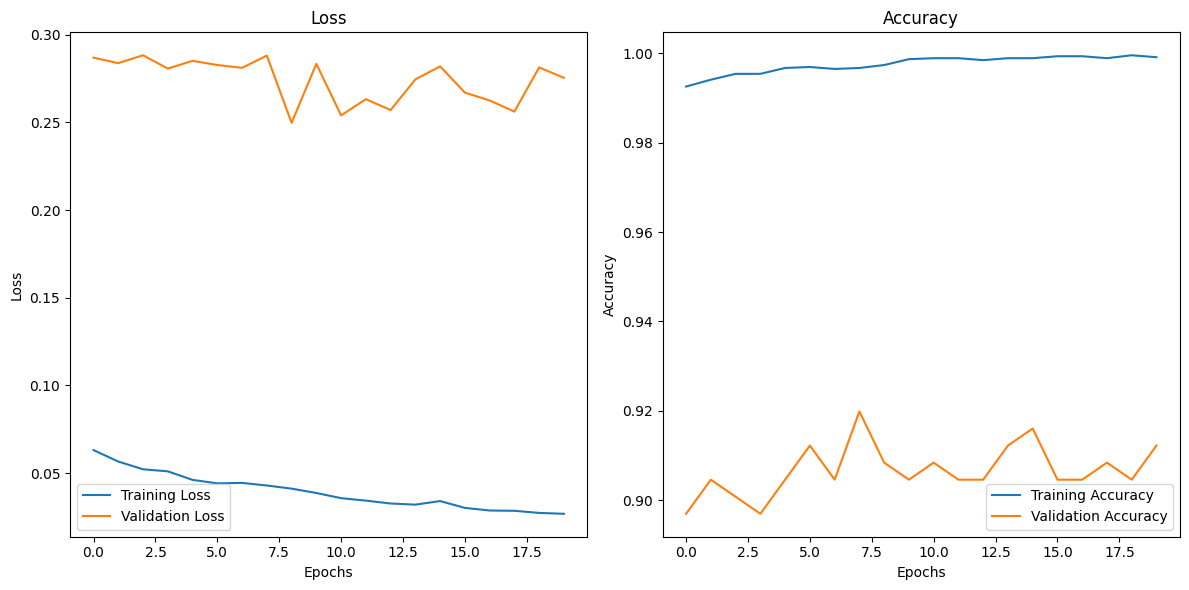

In [19]:
plot_loss_curves(history)

In [20]:
# Serialization of model_1
from tensorflow.keras.models import load_model

ensemble_model.save('Brain_Tumour_Ensemble_Less_No_Reg.keras')

## Last Optimisation
- Merge all the Pre - Trained Model Codes like this

In [ ]:
import tensorflow as tf
from tqdm import tqdm

# Function to create a model using a specified base model
def create_model(base_model, output_units, input_shape=(256, 256, 3)):
    # 1. Create base model with tf.keras.applications
    base_model = base_model(weights='imagenet', include_top=False)

    # 2. Freeze the base model (so the pre-learned patterns remain)
    base_model.trainable = False

    # 3. Create inputs into the base model
    inputs = tf.keras.layers.Input(shape=input_shape, name="input_layer")

    # 4. Pass the inputs to the base_model (note: using tf.keras.applications, inputs don't have to be normalized)
    x = base_model(inputs)

    # 6. Average pool the outputs of the base model (aggregate all the most important information, reduce number of computations)
    x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
    print(f"After GlobalAveragePooling2D(): {x.shape}")

    # 7. Create the output activation layer
    outputs = tf.keras.layers.Dense(output_units, activation="softmax", name="output_layer")(x)

    # 8. Combine the inputs with the outputs into a model
    model = tf.keras.Model(inputs, outputs)

    # 9. Compile the model
    with tf.device(device_name):
        model.compile(
            loss='categorical_crossentropy',
            optimizer=tf.keras.optimizers.Adam(),
            metrics=["accuracy"]
        )

    return model

# ResNet152V2
model_6 = create_model(tf.keras.applications.ResNet152V2, output_units=4)

# InceptionResNetV2
model_7 = create_model(tf.keras.applications.InceptionResNetV2, output_units=4)

# DenseNet201
model_8 = create_model(tf.keras.applications.DenseNet201, output_units=4)

# You can train each model separately if needed
# history_6 = model_6.fit(train_data, epochs=20, steps_per_epoch=len(train_data), validation_data=testing_data, validation_steps=len(testing_data))
# history_7 = model_7.fit(train_data, epochs=20, steps_per_epoch=len(train_data), validation_data=testing_data, validation_steps=len(testing_data))
# history_8 = model_8.fit(train_data, epochs=20, steps_per_epoch=len(train_data), validation_data=testing_data, validation_steps=len(testing_data))
